In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#####calculating mean of "credit score"#####

data['CreditScore'].mean()


650.5288

In [11]:
######calculating the median of "credit score"#######

data['CreditScore'].median()


652.0

In [12]:
######calculating the standard deviation of "credit score"#####

data['CreditScore'].std()


96.65329873613061

In [15]:
#######frequency table for credit score########

data['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<AxesSubplot:>

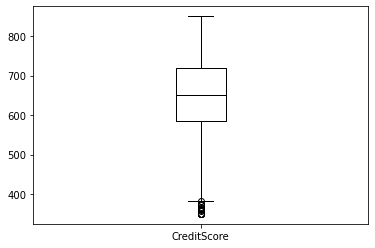

In [18]:
#creating charts for cerdit score#

import matplotlib.pyplot as plt

data.boxplot(column=['CreditScore'], grid=False, color='black')

In [28]:
######calculating the median of "EstimatedSalary"#######

data['EstimatedSalary'].median()

100193.915

In [29]:
#####calculating mean of "EstimatedSalary"#####

data['EstimatedSalary'].mean()

100090.2398809998

In [30]:
######calculating the standard deviation of "EstimatedSalary"#####

data['EstimatedSalary'].std()

57510.49281769822

In [31]:
#######frequency table for EstimatedSalary########

data['EstimatedSalary'].value_counts()

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

<AxesSubplot:>

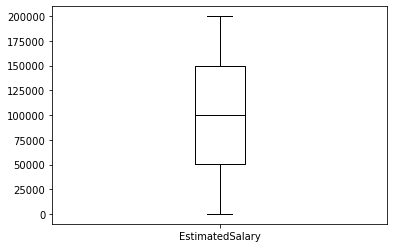

In [32]:
#creating charts for EstimatedSalary#

import matplotlib.pyplot as plt

data.boxplot(column=['EstimatedSalary'], grid=False, color='black')

Text(0, 0.5, 'Estimated salary')

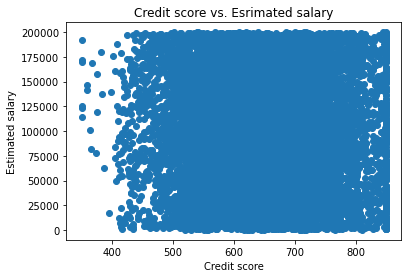

In [19]:
import matplotlib.pyplot as plt

#create scatterplot of credirscore and estimated salary
plt.scatter(data.CreditScore, data.EstimatedSalary)
plt.title('Credit score vs. Esrimated salary')
plt.xlabel('Credit score')
plt.ylabel('Estimated salary')

In [20]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [23]:
import statsmodels.api as sm

#define response variable
y = data['CreditScore']

#define explanatory variable
x = data[['EstimatedSalary']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Sun, 09 Oct 2022   Prob (F-statistic):              0.890
Time:                        15:14:15   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    3

C:\Users\Home\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


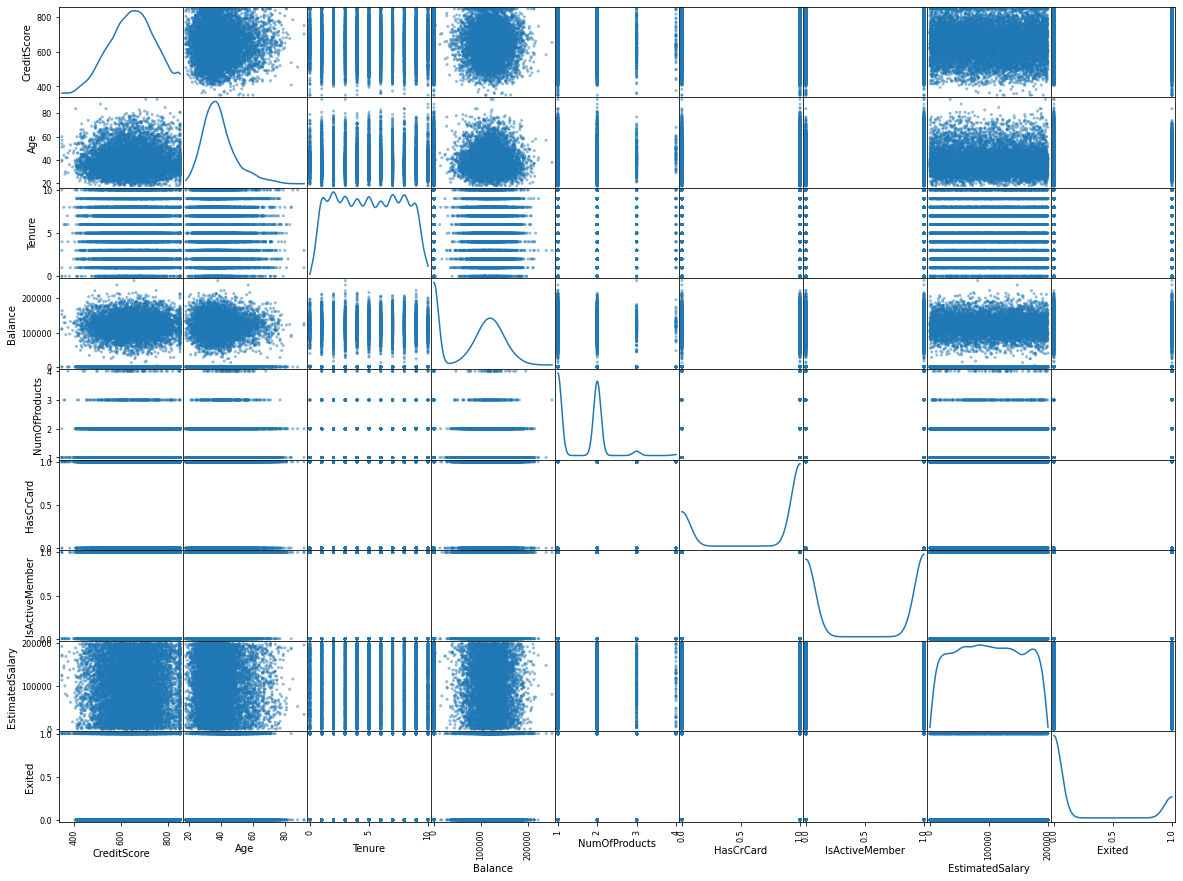

In [34]:
######matrix scatterplot#######

pd.plotting.scatter_matrix(data.loc[:, "CreditScore":"Exited"], diagonal="kde",figsize=(20,15))
plt.show()

In [36]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


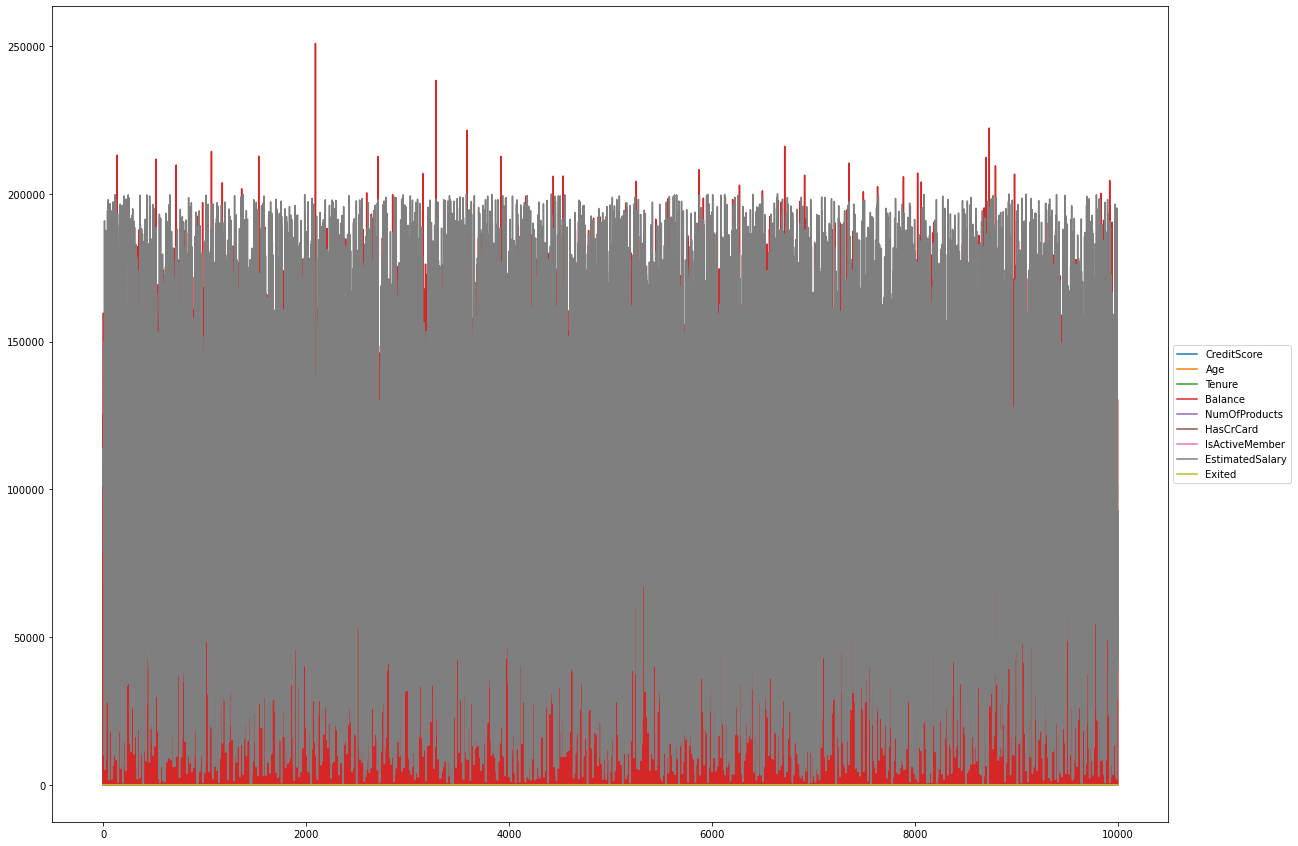

In [38]:
############profile plot##########
ax = data[["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [50]:
import numpy as np

In [58]:
x=pd.DataFrame(data)
print(x.tail())

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

In [83]:
x=data.drop(["Surname" , "Geography" ,"Gender","RowNumber","CustomerId"],axis='columns')
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2  

In [84]:
x.apply(np.mean)

CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

In [85]:
x.apply(np.std)

CreditScore           96.648466
Age                   10.487282
Tenure                 2.892030
Balance            62394.285254
NumOfProducts          0.581625
HasCrCard              0.455818
IsActiveMember         0.499772
EstimatedSalary    57507.617221
Exited                 0.402748
dtype: float64

In [87]:
x.apply(np.max)

CreditScore           850.00
Age                    92.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           4.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    199992.48
Exited                  1.00
dtype: float64

In [88]:
x.apply(np.min)

CreditScore        350.00
Age                 18.00
Tenure               0.00
Balance              0.00
NumOfProducts        1.00
HasCrCard            0.00
IsActiveMember       0.00
EstimatedSalary     11.58
Exited               0.00
dtype: float64

In [92]:
####Drop rows or columns that have a missing value#####

data.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
numerical = data[['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','EstimatedSalary']]
categorical = data[['Surname','Geography','Gender']]

In [96]:
print(data['Surname'].unique())
print(data['Geography'].unique())
print(data['Gender'].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


In [100]:
from sklearn.preprocessing import LabelEncoder

marry_encoder = LabelEncoder()

marry_encoder.fit(categorical['Gender'])

marry_values = marry_encoder.transform(categorical['Gender'])

print("Before Encoding:", list(categorical['Gender'][-10:]))
print("After Encoding:", marry_values[-10:])
print("The inverse from the encoding result:", marry_encoder.inverse_transform(marry_values[-10:]))

Before Encoding: ['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female']
After Encoding: [1 0 1 1 0 1 1 0 1 0]
The inverse from the encoding result: ['Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female']


In [102]:
########splitting the data into dependant and independant##########
X = data.iloc[:, 0:-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [103]:
#####Extracting the Dataset to Get the Dependent Vector#######
Y = data.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

